# Implementing Multi-Class Categorisation Learning

Using MNIST Hand-written digit data-set: https://www.kaggle.com/datasets/hojjatk/mnist-dataset

import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

MNIST Data - Reader Function https://www.kaggle.com/code/hojjatk/read-mnist-dataset

In [2]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#

class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)   

Functions to verfiy images

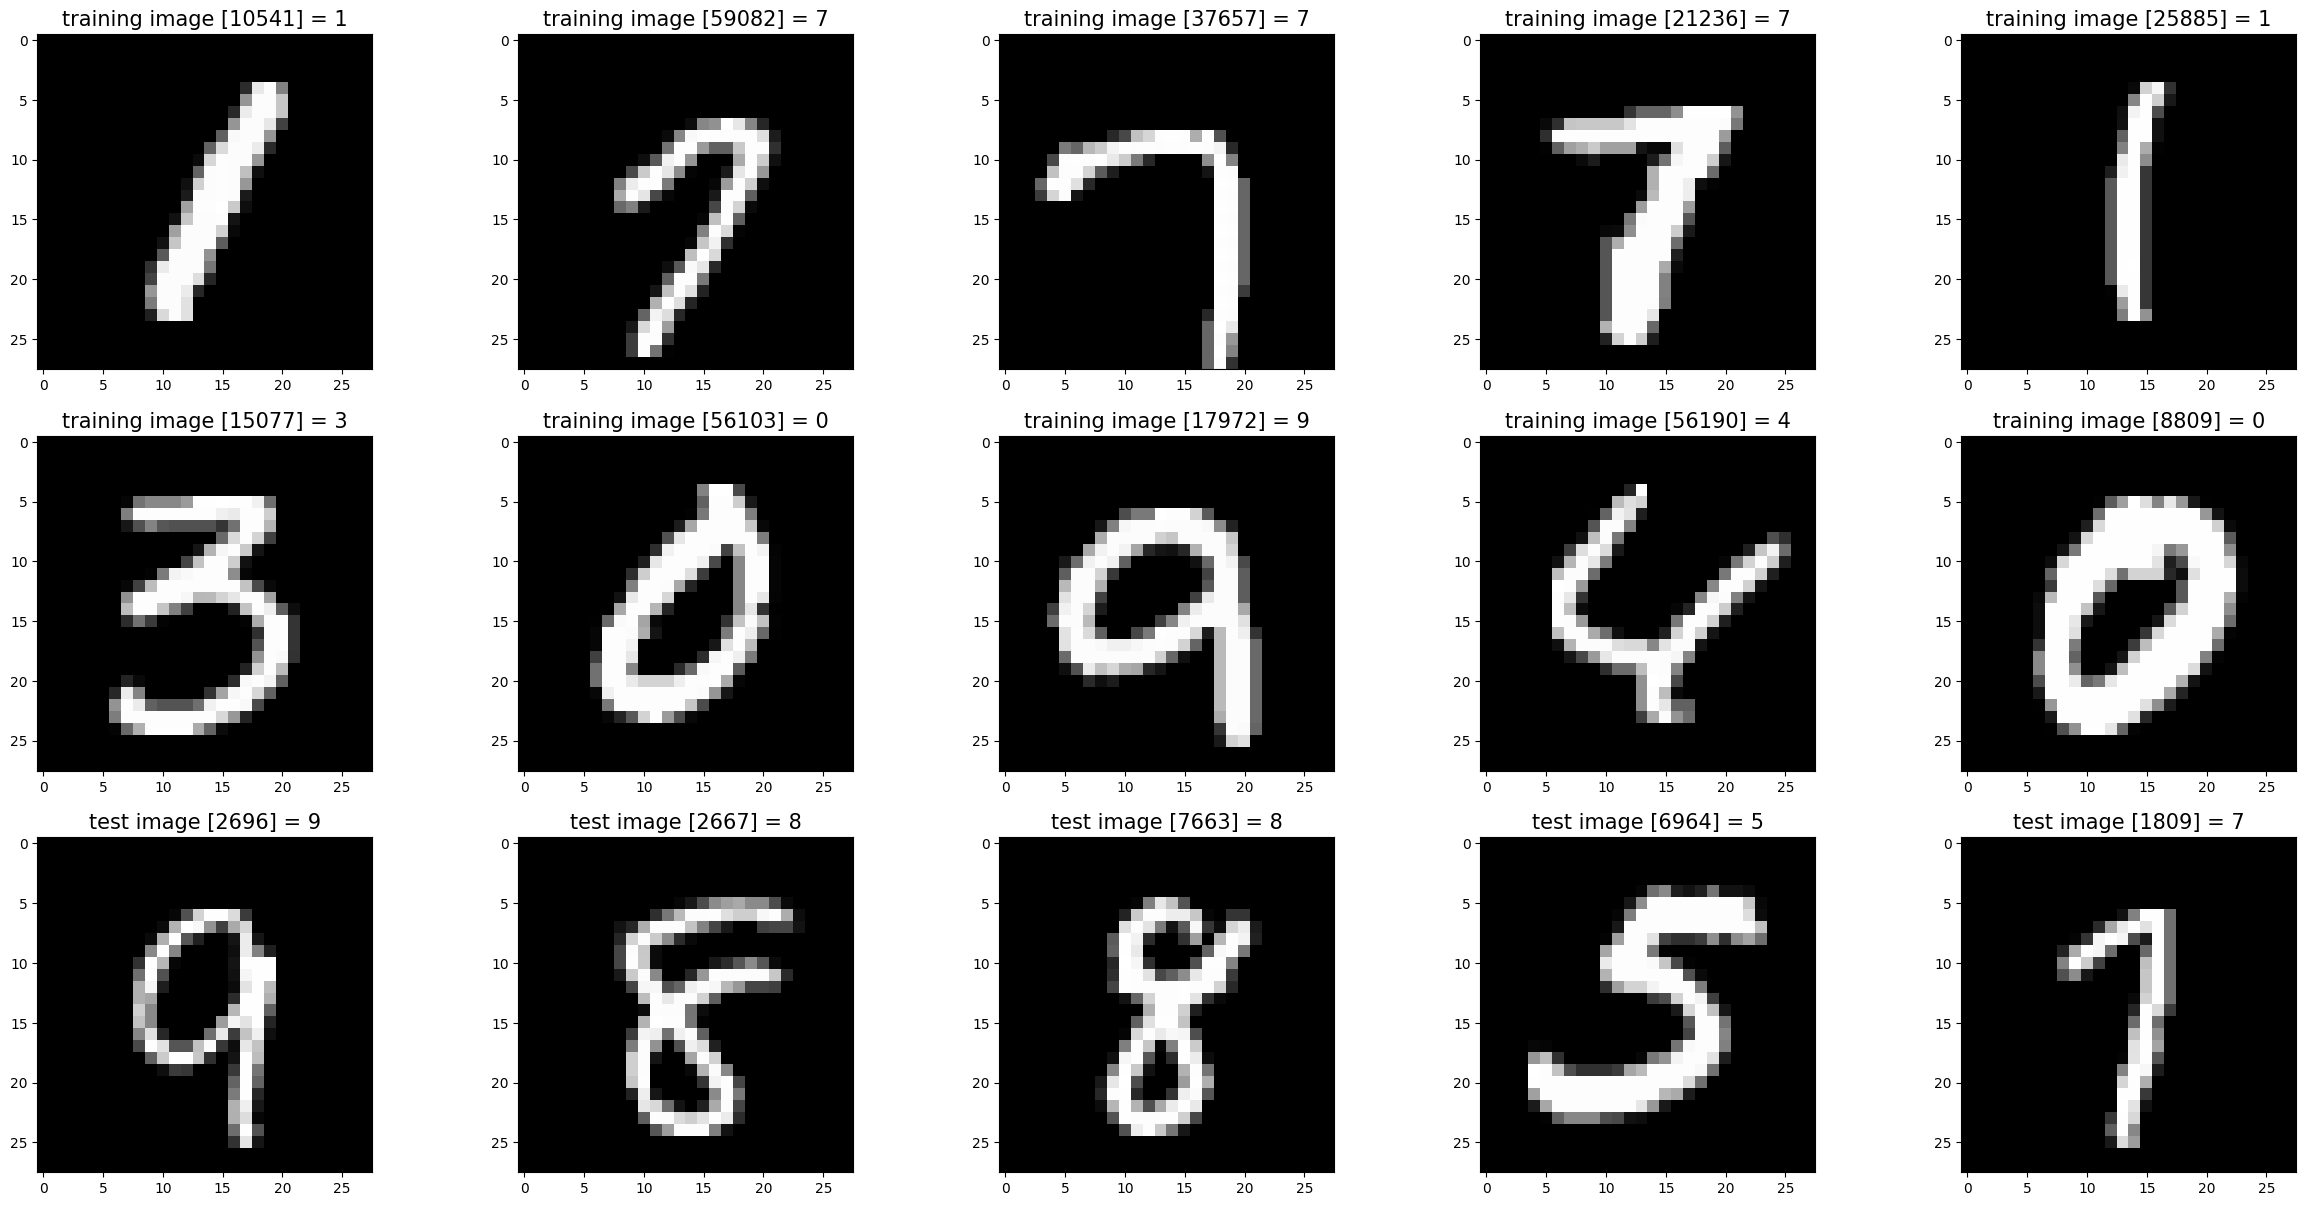

In [3]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = '/Users/dhruvgupta/Documents/AI_Learning/Andrew_Ng_Coursera/MNIST-Dataset/'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1
#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

## Analyse Data-set

Look at shape and properties of x_train data

In [4]:
x_train_df = pd.DataFrame(x_train)
print(x_train_df.shape)
print(x_train[0])

x_train = np.array(x_train)

(60000, 28)
[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8), array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8), array([  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
       253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
         0,   0], dtype=uint8), array([  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253

Turn each row from a 28 x 28 array into a 1 x 784 array

In [5]:
x_train = x_train.reshape(x_train.shape[0],-1) # for a 3d array

print(x_train.shape)
print(x_train[0])

(60000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0  

Investigate labels: y_train

In [6]:
y_train=np.array(y_train)

print(y_train.shape)

#convert into 2-D (matrix) seems to make solution unstable....
y_train = np.expand_dims(y_train, axis=1)
print(y_train.shape)
print(y_train[0])
print(np.sum(y_train ==9))

(60000,)
(60000, 1)
[5]
5949


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.losses import SparseCategoricalCrossentropy


Fit Model - using softmax as final layer not "Linear"

In [8]:
model = Sequential([
    tf.keras.Input(shape=(784,)), # without this line - does not build parameters as there is no input
    Dense(units = 25, activation = 'relu',name='L1'),
    Dense(units = 15, activation = 'relu',name='L2'),
    Dense(units=10, activation = 'softmax',name='L3')
],
name = "my_model" )

model.compile(loss=SparseCategoricalCrossentropy(), #from_logits=True
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)) # This is super important



In [9]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 25)             │        19,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,175 (78.81 KB)

 Trainable params: 20,175 (78.81 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
[layer1, layer2, layer3] = model.layers

#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [11]:
history = model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 402us/step - loss: 3.9427
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 405us/step - loss: 1.4485
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 392us/step - loss: 0.9901
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 384us/step - loss: 0.6330
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 383us/step - loss: 0.3449
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 386us/step - loss: 0.2658
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 389us/step - loss: 0.2408
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - loss: 0.2234
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 391us/step - loss: 0.2058
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step - loss: 0.1993
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 392us/step - loss: 0.1873
Epoch 12/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 393us/step - loss: 0.1742
Epoch 13/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 390us/step - loss: 0.1686
Epoch 14/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 381us/step - loss: 0.1684
E

Print final Cost

dict_keys(['loss'])
[2.1806576251983643, 1.310789704322815, 0.9224035143852234, 0.5413366556167603, 0.32926738262176514, 0.26786017417907715, 0.24454833567142487, 0.22261874377727509, 0.2112472504377365, 0.1972566694021225, 0.1902214139699936, 0.18249645829200745, 0.17507196962833405, 0.16957710683345795, 0.16478529572486877, 0.16208143532276154, 0.16101905703544617, 0.15262340009212494, 0.15206775069236755, 0.14910711348056793]


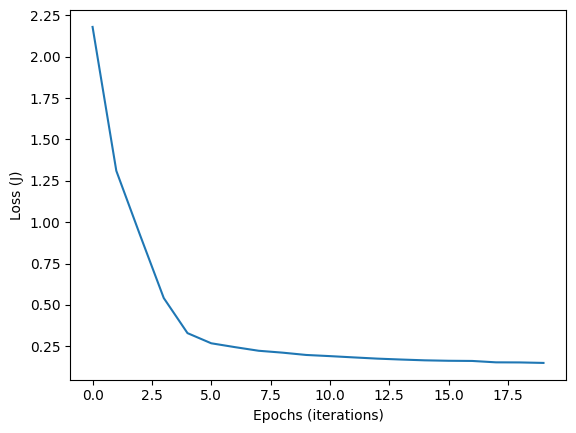

In [12]:
print(history.history.keys())
print(history.history['loss'])

plt.plot(history.history['loss'])
plt.xlabel('Epochs (iterations)')
plt.ylabel('Loss (J)')
plt.show()

Predict Values based on model

In [14]:
y_hat = model.predict(x_train)

print(y_hat.shape)
print(y_hat[1])



1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 283us/step
(60000, 10)
[9.7777331e-01 2.7624282e-04 3.9062320e-04 2.0594863e-04 9.3249424e-04
 9.6910400e-03 1.6270583e-03 1.1708832e-04 4.1959202e-03 4.7901981e-03]


Apply Classification Threshold

In [31]:

predictions = np.where(y_hat >= 0.5, 1, 0)

print(predictions[0])

[0 0 0 0 0 1 0 0 0 0]


Convert back from one-hot matrix

In [35]:

digit = np.argmax(predictions[0])
prediction_digit = np.argmax(predictions, axis=1)
print(prediction_digit.shape)

(60000,)


Adjust Classification Threshold to plot AOC